In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
import joblib

### Reading the Dataset

In [26]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


### Data Preprocessing

In [27]:
df_1 = df.drop(columns="Unnamed: 0")
df_1.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [28]:
(df_1.isna().sum() * 100 / len(df_1)).round(2)

cut                             0.00
color                           0.00
clarity                         0.00
carat_weight                    0.00
cut_quality                     0.00
lab                             0.00
symmetry                        0.00
polish                          0.00
eye_clean                       0.00
culet_size                      0.00
culet_condition                 0.00
depth_percent                   0.00
table_percent                   0.00
meas_length                     0.00
meas_width                      0.00
meas_depth                      0.00
girdle_min                      0.00
girdle_max                      0.00
fluor_color                     0.00
fluor_intensity                65.31
fancy_color_dominant_color      0.00
fancy_color_secondary_color     0.00
fancy_color_overtone            0.75
fancy_color_intensity           0.00
total_sales_price               0.00
dtype: float64

In [29]:
df_1.duplicated().sum()

3880

In [30]:
df_2 = df_1.drop_duplicates()
df_2.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [33]:
pp = df_2.dtypes.reset_index()
data_types_dict = {pp.loc[i,"index"]:str(pp.loc[i,0]) for i in range(len(pp.index))}
data_types_dict

{'cut': 'object',
 'color': 'object',
 'clarity': 'object',
 'carat_weight': 'float64',
 'cut_quality': 'object',
 'lab': 'object',
 'symmetry': 'object',
 'polish': 'object',
 'eye_clean': 'object',
 'culet_size': 'object',
 'culet_condition': 'object',
 'depth_percent': 'float64',
 'table_percent': 'float64',
 'meas_length': 'float64',
 'meas_width': 'float64',
 'meas_depth': 'float64',
 'girdle_min': 'object',
 'girdle_max': 'object',
 'fluor_color': 'object',
 'fluor_intensity': 'object',
 'fancy_color_dominant_color': 'object',
 'fancy_color_secondary_color': 'object',
 'fancy_color_overtone': 'object',
 'fancy_color_intensity': 'object',
 'total_sales_price': 'int64'}

In [44]:
non_numeric_types = []
numeric_types = []
for i in data_types_dict:
    if data_types_dict[i] == "object":
        non_numeric_types.append(i)
    else:
        numeric_types.append(i)
numeric_types_float = numeric_types[0:len(numeric_types)-1]
numeric_types_int = numeric_types[len(numeric_types)-1]

In [45]:
df_3 = df_2.copy()
le = LabelEncoder()
for i in non_numeric_types:
    df_3[i] = le.fit_transform(df_2[i])
    joblib.dump(value=le,filename=i+".joblib")

In [46]:
df_3.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,7,12,10,7,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,7,12,10,7,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,7,12,10,7,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,7,12,10,7,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,7,12,10,7,9,200


### Outlier Detection

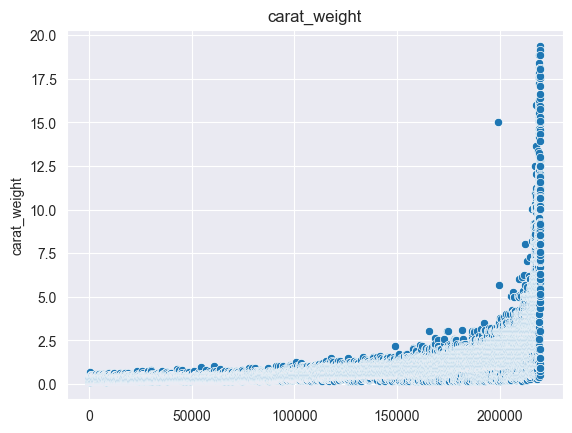

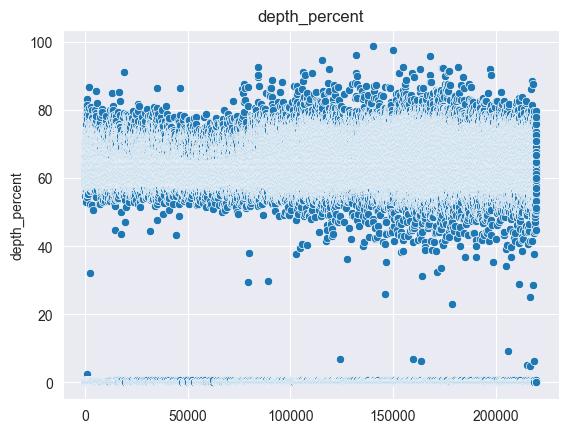

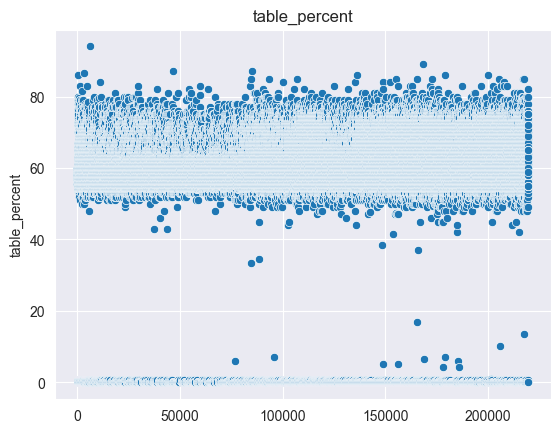

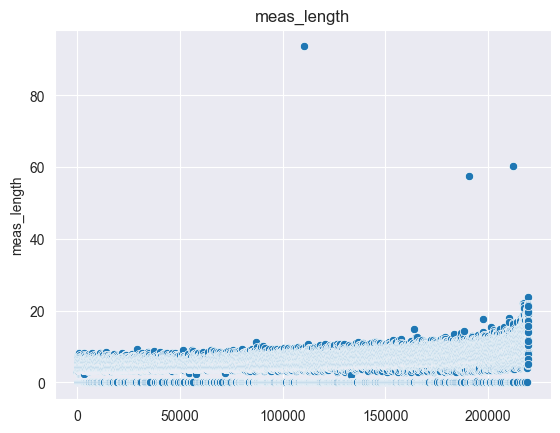

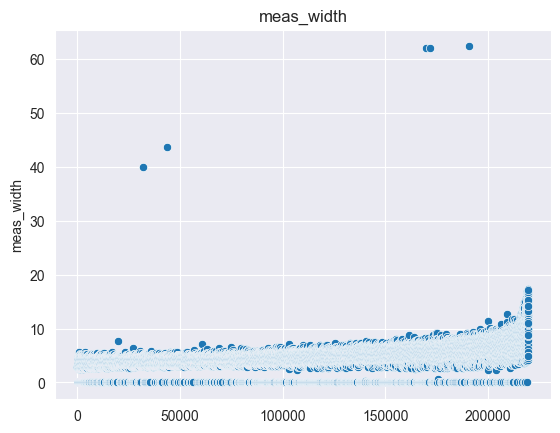

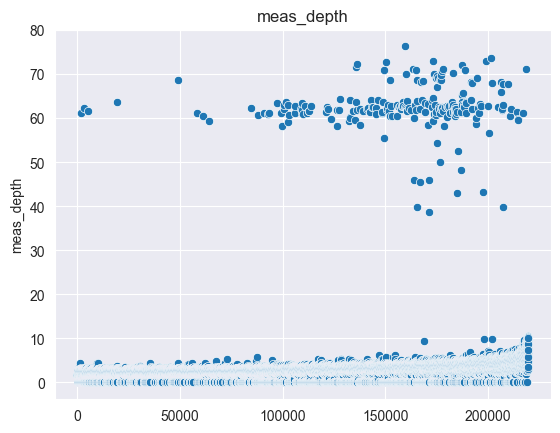

In [60]:
for i in numeric_types_float:
    sns.scatterplot(data=df_3[i])
    plt.title(i)
    plt.show()